In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df=pd.read_csv('/content/drive/My Drive/FINAL PROJECT/for_recommendation.csv')
df.head()

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,5,201703,2017-09-13 08:59:02,201703,New,1,Inactive
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,4,201702,2017-04-26 10:53:06,201702,New,3,Inactive
2,2,c105be01f21c9df6a2579f59b95cbcd9,02288a47f696f3054b9ef1d5f8e73973,d2f5484cbffe4ca766301b21ab9246dd,24.73,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-09-18 16:12:04,5,201703,2017-04-26 10:53:06,201702,Existing,3,Inactive
3,3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,5,201801,2018-01-14 14:33:31,201801,New,3,Inactive
4,4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,25.78,perfumery,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,4,201803,2018-08-08 10:00:35,201803,New,4,Cold


In [ ]:
df.shape

(100486, 16)

In [ ]:
df.customer_unique_id.nunique()

93664

In [ ]:
.8*(df.total_money.sum())

12417106.872000003

In [ ]:
df.groupby('product_category_name_english')['total_money'].sum().sort_values(ascending=False).head(10)

product_category_name_english
health_beauty            1437665.78
watches_gifts            1298292.47
bed_bath_table           1240386.13
sports_leisure           1147244.63
computers_accessories    1050941.58
furniture_decor           899626.04
housewares                772035.14
cool_stuff                704086.24
auto                      678606.64
garden_tools              579525.20
Name: total_money, dtype: float64

In [ ]:
x=df.groupby(['product_category_name_english','product_id'],as_index=False)['total_money'].sum().sort_values(ascending=False,by='total_money')
x=x.reset_index()
x

,index,product_category_name_english,product_id,total_money
0,17584,health_beauty,bb50f2e236e5eea0100680137654686c,67606.10
1,7947,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,60597.29
2,16835,health_beauty,6cdd53843498f92890544667809f1595,59093.99
3,4965,bed_bath_table,99a4788cb24856965c36a24e339b6058,50963.60
4,6620,computers,d6160fb7873f184099d9bc95e30376af,50326.18
...,...,...,...,...
32112,13103,furniture_decor,501c6da13fd2e5d497c42b29eeddc95d,10.88
32113,17210,health_beauty,9334fc63bffa67f685c03b1dc24df180,10.48
32114,27569,stationery,310dc32058903b6416c71faff132df9e,10.07
32115,23353,perfumery,d51e0a7f437c0d14f560082ed007fd85,9.95


In [ ]:
y=df.groupby(['product_category_name_english','product_id'])['product_id'].count().sort_values(ascending=False)
y=pd.DataFrame(y)
y=y.rename(columns={'product_id':'count'})
y=y.reset_index()
y

,product_category_name_english,product_id,count
0,bed_bath_table,99a4788cb24856965c36a24e339b6058,466
1,furniture_decor,aca2eb7d00ea1a7b8ebd4e68314663af,431
2,garden_tools,422879e10f46682990de24d770e7f83d,352
3,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,321
4,garden_tools,389d119b48cf3043d311335e499d9c6b,310
...,...,...,...
32112,home_appliances,14f964bb089089d5e114cdaf786ce1b9,1
32113,home_appliances,15050d3aa6e44bc924642e38dc255677,1
32114,home_appliances,16b5adf7a7890633a2642ea9bd8a9ea5,1
32115,home_appliances,1713e5b60dfb5b779fd077af351624c0,1


In [ ]:
df_inactive=pd.merge(x,y,on=['product_category_name_english','product_id'],how='inner')
df_inactive

,index,product_category_name_english,product_id,total_money,count
0,17584,health_beauty,bb50f2e236e5eea0100680137654686c,67606.10,187
1,7947,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,60597.29,321
2,16835,health_beauty,6cdd53843498f92890544667809f1595,59093.99,151
3,4965,bed_bath_table,99a4788cb24856965c36a24e339b6058,50963.60,466
4,6620,computers,d6160fb7873f184099d9bc95e30376af,50326.18,35
...,...,...,...,...,...
32112,13103,furniture_decor,501c6da13fd2e5d497c42b29eeddc95d,10.88,1
32113,17210,health_beauty,9334fc63bffa67f685c03b1dc24df180,10.48,1
32114,27569,stationery,310dc32058903b6416c71faff132df9e,10.07,1
32115,23353,perfumery,d51e0a7f437c0d14f560082ed007fd85,9.95,1


In [ ]:
df_inactive.sort_values(ascending=False,by=['total_money','count'])

,index,product_category_name_english,product_id,total_money,count
0,17584,health_beauty,bb50f2e236e5eea0100680137654686c,67606.10,187
1,7947,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,60597.29,321
2,16835,health_beauty,6cdd53843498f92890544667809f1595,59093.99,151
3,4965,bed_bath_table,99a4788cb24856965c36a24e339b6058,50963.60,466
4,6620,computers,d6160fb7873f184099d9bc95e30376af,50326.18,35
...,...,...,...,...,...
32112,13103,furniture_decor,501c6da13fd2e5d497c42b29eeddc95d,10.88,1
32113,17210,health_beauty,9334fc63bffa67f685c03b1dc24df180,10.48,1
32114,27569,stationery,310dc32058903b6416c71faff132df9e,10.07,1
32115,23353,perfumery,d51e0a7f437c0d14f560082ed007fd85,9.95,1


In [ ]:
#x=['health_beauty','watches_gifts','bed_bath_table','sports_leisure','computers_accessories']
df_n=df_inactive[(df_inactive['product_category_name_english']=='health_beauty') | (df_inactive['product_category_name_english']=='watches_gifts') \
                 |(df_inactive['product_category_name_english']=='bed_bath_table') | (df_inactive['product_category_name_english']=='sports_leisure') \
                 | (df_inactive['product_category_name_english']=='computers_accessories')]

In [ ]:
df_n

,index,product_category_name_english,product_id,total_money,count
0,17584,health_beauty,bb50f2e236e5eea0100680137654686c,67606.10,187
1,7947,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,60597.29,321
2,16835,health_beauty,6cdd53843498f92890544667809f1595,59093.99,151
3,4965,bed_bath_table,99a4788cb24856965c36a24e339b6058,50963.60,466
5,7030,computers_accessories,3dd2a17168ec895c781a9191c1e95ad7,48212.22,255
...,...,...,...,...,...
32105,25086,sports_leisure,325a06bcce0da45b7f4ecf2797dd40e4,13.22,1
32106,17907,health_beauty,da86f3242cb55a55dd9cd7b19d951685,12.28,1
32108,25482,sports_leisure,567f4f60d4e44c92dd00ecd0920ce6b1,11.82,1
32113,17210,health_beauty,9334fc63bffa67f685c03b1dc24df180,10.48,1


In [ ]:
df_n[df_n['product_category_name_english']=='health_beauty'].sort_values(ascending=False,by='total_money').head(10)

,index,product_category_name_english,product_id,total_money,count
0,17584,health_beauty,bb50f2e236e5eea0100680137654686c,67606.10,187
2,16835,health_beauty,6cdd53843498f92890544667809f1595,59093.99,151
22,16234,health_beauty,2b4609f8948be18874494203496bc318,26556.78,258
24,16082,health_beauty,19c91ef95d509ea33eda93495c4d3481,24326.25,155
40,16994,health_beauty,7c1bd920dbdf22470b68bde975dd3ccf,17609.48,225
50,17142,health_beauty,8c292ca193d326152e335d77176746f0,15371.22,84
64,16414,health_beauty,3fbc0ef745950c7932d5f2a446189725,13772.65,144
69,16180,health_beauty,24c66f106f642621e524291a895c9032,13273.96,64
73,16184,health_beauty,25292482a61cb3298df8dbe15ea69daf,12827.21,10
77,17461,health_beauty,af0a99476d96dcc1a1baa7c0d9ff6b9d,12451.50,22


In [ ]:
df_n[df_n['product_category_name_english']=='watches_gifts'].sort_values(ascending=False,by='total_money').head(10)

,index,product_category_name_english,product_id,total_money,count
9,31242,watches_gifts,53b36df67ebb7c41585e8d54d6772e08,39957.93,306
10,31978,watches_gifts,e0d64dcfaa3b6db5c54ca298ae101d05,35344.09,194
12,31899,watches_gifts,d285360f29ac7fd97640bf0baef03de0,33607.57,122
14,31438,watches_gifts,7a10781637204d8d10485c71a6108a2e,32790.74,142
15,32079,watches_gifts,f819f0c84a64f02d3a5606ca95edd272,30449.69,45
19,31665,watches_gifts,a62e25e09e05e6faf31d90c6ec1aa3d1,27873.78,171
25,31181,watches_gifts,461f43be3bdf8844e65b62d9ac2c7a5a,23215.83,144
29,31383,watches_gifts,6f3b5b605d91b7439c5e3f5a8dffeea7,20949.97,117
34,30945,watches_gifts,1a080577618e7fe4d9ddd8fb2b47a964,18938.17,32
54,31688,watches_gifts,a92930c327948861c015c919a0bcb4a8,14980.53,158


In [ ]:
df_n[df_n['product_category_name_english']=='bed_bath_table'].sort_values(ascending=False,by='total_money').head(10)

,index,product_category_name_english,product_id,total_money,count
3,4965,bed_bath_table,99a4788cb24856965c36a24e339b6058,50963.60,466
13,5973,bed_bath_table,f1c7f353075ce59d8a6f3cf58f419c9c,33316.76,150
81,4706,bed_bath_table,84f456958365164420cfc80fbe4c7fab,12160.45,106
86,3615,bed_bath_table,2a2d22ae30e026f1893083c8405ca522,11725.86,69
96,3570,bed_bath_table,25f86162fee18735fffdb762dcb10d7c,10963.80,54
98,6091,bed_bath_table,fbce4c4cb307679d89a3bf3d3bb353b9,10801.62,57
117,5500,bed_bath_table,c6ea63369936552872ae890c82175b4b,9742.41,43
127,6094,bed_bath_table,fc1d8637c0268af3db482c14b7ef8e75,9455.89,54
137,4892,bed_bath_table,952670bc019a73f0933157ec82ff6e4f,8982.56,40
147,4343,bed_bath_table,64fb265487de2238627ce43fe8a67efc,8518.96,73


In [ ]:
df_n[df_n['product_category_name_english']=='sports_leisure'].sort_values(ascending=False,by='count').head(10)

,index,product_category_name_english,product_id,total_money,count
321,26739,sports_leisure,c6336fa91fbd87c359e44f5dca5a90ed,5285.64,82
102,27107,sports_leisure,e44f675b60b3a3a2453ec36421e06f0f,10263.75,77
247,26854,sports_leisure,cec09725da5ed01471d9a505e7389d37,6285.01,65
304,24757,sports_leisure,11875b30b49585209e608f40e8082e65,5504.58,60
730,25282,sports_leisure,44a34214a57dc373dcd80f54c919d006,2995.70,49
364,25134,sports_leisure,362b773250263786dd58670d2df42c3b,4763.39,49
199,25850,sports_leisure,781afe929e3016a667f5f439afd55fce,7313.34,48
732,26914,sports_leisure,d3c044bd42d84a79e3b0c42662806a48,2987.29,48
579,24836,sports_leisure,19421075ae0b585f2dc13ff149e2119d,3576.44,45
705,24630,sports_leisure,054515fd15bc1a2029f10de97ffa9120,3073.67,44


In [ ]:
df_n[df_n['product_category_name_english']=='computers_accessories'].sort_values(ascending=False,by='count').head(10)

,index,product_category_name_english,product_id,total_money,count
1,7947,computers_accessories,d1c427060a0f73f6b889a5c7c61f2ac4,60597.29,321
5,7030,computers_accessories,3dd2a17168ec895c781a9191c1e95ad7,48212.22,255
36,8086,computers_accessories,e53e557d5a159f5aa2c5e995dfdf244b,18409.72,156
59,7268,computers_accessories,656e0eca68dcecf6a31b8ececfabe3e8,14408.96,114
74,6983,computers_accessories,36f60d45225e60c7da4558b070ce4b60,12818.21,111
201,7933,computers_accessories,d04857e7b4b708ee8b8b9921163edba3,7260.01,83
138,7036,computers_accessories,3f14d740544f37ece8a9e7bc8349797e,8982.15,79
62,7058,computers_accessories,4298b7e67dc399c200662b569563a2b2,13955.34,77
55,7832,computers_accessories,bee2e070c39f3dd2f6883a17a5f0da45,14953.81,74
681,6795,computers_accessories,18b0e642cbae7251e60a64aa07dd9eb9,3143.92,73


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings

from keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from keras.models import Model

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/My Drive/FINAL PROJECT/for_recommendation.csv')
df.head()

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,5,201703,2017-09-13 08:59:02,201703,New,1,Inactive
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,4,201702,2017-04-26 10:53:06,201702,New,3,Inactive
2,2,c105be01f21c9df6a2579f59b95cbcd9,02288a47f696f3054b9ef1d5f8e73973,d2f5484cbffe4ca766301b21ab9246dd,24.73,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-09-18 16:12:04,5,201703,2017-04-26 10:53:06,201702,Existing,3,Inactive
3,3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,5,201801,2018-01-14 14:33:31,201801,New,3,Inactive
4,4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,25.78,perfumery,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,4,201803,2018-08-08 10:00:35,201803,New,4,Cold


In [ ]:
df_hot = df[df['segment']=='Hot']
df_hot.shape

(1266, 16)

In [ ]:
dataset=df_hot[['customer_unique_id','product_id','review_score']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
dataset['customer_unique_id'] = labelencoder.fit_transform(dataset['customer_unique_id'])
dataset['product_id'] = labelencoder.fit_transform(dataset['product_id'])

dataset

,customer_unique_id,product_id,review_score
135,204,1096,1
136,204,343,1
137,204,1096,5
138,204,237,1
269,46,245,5
...,...,...,...
99813,505,478,3
100129,142,477,1
100380,72,579,4
100381,72,855,4


In [ ]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
train.head()

,customer_unique_id,product_id,review_score
2543,399,519,4
7870,63,921,5
40528,153,276,5
59853,184,887,5
13913,385,223,5


In [ ]:

n_users = len(dataset.customer_unique_id.unique())
n_users

545

In [ ]:
n_prod = len(dataset.product_id.unique())
n_prod

1113

In [ ]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_prod+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# performing dot product and creating model
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

In [ ]:
from keras.models import load_model

if os.path.exists('regression_model.h5'):
    model = load_model('regression_model.h5')
else:
    history = model.fit([train.customer_unique_id, train.product_id], train.review_score, epochs=10, verbose=1)
    model.save('regression_model.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model.evaluate([test.customer_unique_id, test.product_id], test.review_score)


8/8 [==============================] - 0s 1ms/step - loss: 17.6452


17.645221710205078

In [ ]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(n_prod+1, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)

# creating user embedding path
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(n_users+1, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)

# concatenate features
conc = Concatenate()([book_vec, user_vec])

# add fully-connected-layers
fc1 = Dense(128, activation='relu')(conc)
fc2 = Dense(32, activation='relu')(fc1)
out = Dense(1)(fc2)

# Create model and compile it
model2 = Model([user_input, book_input], out)
model2.compile('adam', 'mean_squared_error')

Epoch 1/50
32/32 [==============================] - 0s 1ms/step - loss: 15.8580
Epoch 2/50
32/32 [==============================] - 0s 1ms/step - loss: 7.8977
Epoch 3/50
32/32 [==============================] - 0s 1ms/step - loss: 2.1710
Epoch 4/50
32/32 [==============================] - 0s 1ms/step - loss: 1.4727
Epoch 5/50
32/32 [==============================] - 0s 1ms/step - loss: 0.8204
Epoch 6/50
32/32 [==============================] - 0s 1ms/step - loss: 0.4014
Epoch 7/50
32/32 [==============================] - 0s 1ms/step - loss: 0.2197
Epoch 8/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1462
Epoch 9/50
32/32 [==============================] - 0s 1ms/step - loss: 0.1129
Epoch 10/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0917
Epoch 11/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0816
Epoch 12/50
32/32 [==============================] - 0s 1ms/step - loss: 0.0746
Epoch 13/50
32/32 [=============================

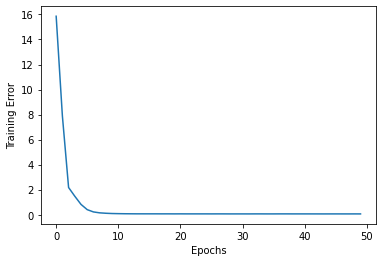

In [ ]:

from keras.models import load_model

if os.path.exists('regression_model2.h5'):
    model2 = load_model('regression_model2.h5')
else:
    history = model2.fit([train.customer_unique_id, train.product_id], train.review_score, epochs=50, verbose=1)
    model2.save('regression_model2.h5')
    plt.plot(history.history['loss'])
    plt.xlabel("Epochs")
    plt.ylabel("Training Error")

In [ ]:
model2.evaluate([test.customer_unique_id, test.product_id], test.review_score)
#model2.accuracy_score

8/8 [==============================] - 0s 1ms/step - loss: 1.6250


1.6249752044677734

In [ ]:
predictions = model2.predict([test.customer_unique_id.head(10), test.product_id.head(10)])

[print(predictions[i], test.review_score.iloc[i]) for i in range(0,10)]

[3.272249] 5
[3.9270794] 4
[4.508211] 5
[4.7340326] 5
[4.4854555] 5
[4.128344] 5
[1.7293333] 5
[4.2522006] 5
[1.3840753] 4
[2.831753] 5


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
book_em = model.get_layer('Book-Embedding')
book_em_weights = book_em.get_weights()[0]

In [ ]:
book_em_weights[:5]


array([[-0.03904574, -0.00092227,  0.01585301,  0.0276446 ,  0.02965875],
       [ 0.04303778,  0.03960036,  0.00178312, -0.03839409,  0.02857796],
       [ 0.02403516,  0.02275697, -0.01734298, -0.0397432 , -0.00065867],
       [ 0.04889843,  0.00065548,  0.03816232,  0.00753565,  0.00112872],
       [-0.00648421, -0.00511644,  0.04917023, -0.0330881 , -0.03328847]],
      dtype=float32)

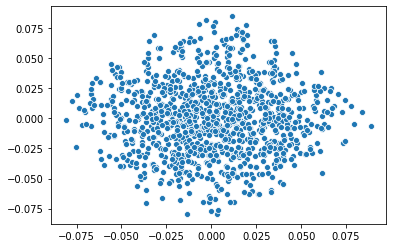

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
book_em_weights = book_em_weights / np.linalg.norm(book_em_weights, axis = 1).reshape((-1, 1))
book_em_weights[0][:10]
np.sum(np.square(book_em_weights[0]))

0.99999994

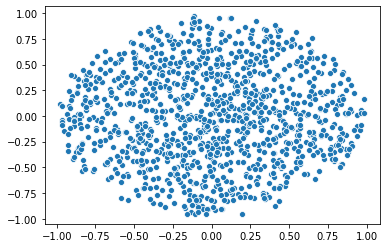

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(book_em_weights)
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1])

In [ ]:
book_data = np.array(list(set(dataset.product_id)))
book_data[:5]

array([0, 1, 2, 3, 4])

In [ ]:
user = np.array([1 for i in range(len(book_data))])
user[:5]

array([1, 1, 1, 1, 1])

In [ ]:
predictions = model.predict([user, book_data])

predictions = np.array([a[0] for a in predictions])

recommended_book_ids = (-predictions).argsort()[:5]

recommended_book_ids

array([ 665,  500, 1111,  482,   89])

In [ ]:
predictions[recommended_book_ids]


array([0.00388073, 0.00387296, 0.0038555 , 0.00377364, 0.00376896],
      dtype=float32)

In [ ]:
dataset[dataset['product_id'].isin(recommended_book_ids)]


,customer_unique_id,product_id,review_score
7592,143,665,2
7593,143,665,4
18863,500,89,1
36927,102,89,5
46365,306,482,5
48638,323,500,5
48683,195,1111,5
75409,129,500,5


In [ ]:
!pip install lightfm

     |████████████████████████████████| 307kB 2.8MB/s 
  Created wheel for lightfm: filename=lightfm-1.15-cp36-cp36m-linux_x86_64.whl size=707636 sha256=29422065711515c587713fe0d7988d1bd470cc9aadf4327da42a5ad99e16b51b
  Stored in directory: /root/.cache/pip/wheels/eb/bb/ac/188385a5da6627956be5d9663928483b36da576149ab5b8f79
Successfully built lightfm


In [ ]:
from lightfm.datasets import fetch_movielens
from lightfm import LightFM


In [ ]:
df_act = df[df['segment']=='Active']
df_act.shape

(224, 16)

In [ ]:
dataset=df_act[['customer_unique_id','product_id','review_score']]

In [ ]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

In [ ]:
model = LightFM(loss = 'warp')

In [ ]:
model.fit(train, epochs=30, num_threads=2)

AttributeError: ignored

Hybrid Recommender


In [ ]:
df_act = df[df['segment']=='Active']
df_act.shape

(224, 16)

In [ ]:
df_act.head()

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment
210,210,0095790a64527ec83aeaaf99023c050e,6081c7acb40f63731b3c982857c79581,e8c6039a25765995ac7c1ec2cbef5765,62.66,watches_gifts,35ecdf6858edc6427223b64804cf028e,delivered,2017-11-15 13:36:30,5,201704,2017-08-05 14:55:19,201703,Existing,10,Active
211,211,5a4ae77af140c48f0cd65b631bdcb342,92af42b44706727c163d09e7b0d8a76c,11875b30b49585209e608f40e8082e65,107.48,sports_leisure,35ecdf6858edc6427223b64804cf028e,delivered,2017-08-05 14:55:19,4,201703,2017-08-05 14:55:19,201703,New,10,Active
212,212,a383762bd79949e1b34878460042cd23,e6cf45b6775e86a43908d40341b3d53d,f0bbc1bdaf90ddcab4aa862660dfc6d3,88.94,luggage_accessories,35ecdf6858edc6427223b64804cf028e,delivered,2018-03-31 21:18:49,1,201801,2017-08-05 14:55:19,201703,Existing,10,Active
213,213,abbfe78fd05873101e792fa04bbad963,3ef07c4bf193cdc766ec811397a59c88,47b8c79d616369fd222f0bb68ea0293b,233.28,health_beauty,35ecdf6858edc6427223b64804cf028e,delivered,2017-10-03 01:25:30,5,201704,2017-08-05 14:55:19,201703,Existing,10,Active
214,214,bcb0343717a9e0265e156e34c25c3dc0,40272bfc2f46fc530bb6eb75977b5a07,06484143f7046fc1c2ec000aba13e28a,45.37,sports_leisure,35ecdf6858edc6427223b64804cf028e,delivered,2017-08-05 14:55:19,4,201703,2017-08-05 14:55:19,201703,New,10,Active


In [ ]:
df_act.customer_unique_id.unique()

array(['35ecdf6858edc6427223b64804cf028e',
       '297ec5afd18366f5ba27520cc4954151',
       '4e65032f1f574189fb793bac5a867bbc',
       'f8bc1d81f395f6239a2a5ab1b9edf1ab',
       'c8460e4251689ba205045f3ea17884a1',
       'a1874c5550d2f0bc14cc122164603713',
       'd75acd4c5b7b4dfd32b9d9172b195419',
       '4facc2e6fbc2bffab2fea92d2b4aa7e4',
       '182053495bc94c2f41090ce8c41be266',
       '7849336c1b7785f258ffef06aedbd216',
       '3e43e6105506432c953e165fb2acf44c',
       '8d50f5eadf50201ccdcedfb9e2ac8455',
       'dc813062e0fc23409cd255f7f53c7074',
       '6469f99c1f9dfae7733b25662e7f1782',
       'c7c19110042036e6266adc998cbf1289',
       '34b0cd95480e55c2a701293a2b9671b3',
       'acea6bd29b8c1e3c6a8b266a8fb4475e',
       'bc3e7032668d3f411c227eec09221362',
       '5e8f38a9a1c023f3db718edcf926a2db',
       'd132b863416f85f2abb1a988ca05dd12',
       '9c08d6f85c7fcec4b08ead25590c0af7',
       '63cfc61cee11cbe306bff5857d00bfe4',
       'f0e310a6839dce9de1638e0fe5ab282a',
       '6a9

In [ ]:
data=df_act[['customer_unique_id','product_id','product_category_name_english','review_score']]

In [ ]:
import pandas as pd
import os
from scipy.sparse import csr_matrix
import numpy as np
from IPython.display import display_html
import warnings

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline

from lightfm.cross_validation import random_train_test_split
from lightfm.evaluation import auc_score, precision_at_k, recall_at_k
from lightfm import LightFM
#from skopt import forest_minimize

In [ ]:
user_prod_interaction = pd.pivot_table(data, index='customer_unique_id', columns='product_id', values='review_score')
# fill missing values with 0
user_prod_interaction = user_prod_interaction.fillna(0)
user_id = list(user_prod_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1
# convert to csr matrix
user_book_interaction_csr = csr_matrix(user_prod_interaction.values)
user_book_interaction_csr

<43x203 sparse matrix of type '<class 'numpy.float64'>'
	with 205 stored elements in Compressed Sparse Row format>

In [ ]:
model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=150,
                user_alpha=0.000005)

model = model.fit(user_book_interaction_csr,
                  epochs=100,
                  num_threads=16, verbose=False)

In [ ]:
item_dict ={}
df_prod = df_act[['product_id', 'product_category_name_english']].sort_values('product_id').reset_index()

for i in range(df_prod.shape[0]):
    item_dict[(df_prod.loc[i,'product_id'])] = df.loc[i,'product_category_name_english']

In [ ]:
user_id = list(user_prod_interaction.index)
user_dict = {}
counter = 0 
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [ ]:
def sample_recommendation_user(model, interactions, user_id, user_dict, 
                               item_dict,threshold = 0,nrec_items = 10, show = True):
    
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))
    
    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter+=1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter+=1

In [ ]:
sample_recommendation_user(model, user_prod_interaction, '1b6c7548a2a1f9037c1fd3ddfed95f33', user_dict, item_dict)


User: 1b6c7548a2a1f9037c1fd3ddfed95f33
Known Likes:
1- garden_tools
2- sports_leisure
3- furniture_decor
4- garden_tools
5- computers_accessories
6- toys
7- watches_gifts
8- bed_bath_table
9- garden_tools

 Recommended Items:
1- bed_bath_table
2- books_technical
3- food_drink
4- sports_leisure
5- garden_tools
6- computers_accessories
7- electronics
8- health_beauty
9- cool_stuff
10- furniture_decor


In [ ]:
sample_recommendation_user(model, user_prod_interaction, 'c8ed31310fc440a3f8031b177f9842c3', user_dict, item_dict)


User: c8ed31310fc440a3f8031b177f9842c3
Known Likes:
1- health_beauty
2- perfumery
3- toys
4- health_beauty
5- computers_accessories
6- consoles_games
7- fashion_bags_accessories
8- health_beauty

 Recommended Items:
1- books_technical
2- stationery
3- food
4- luggage_accessories
5- air_conditioning
6- sports_leisure
7- bed_bath_table
8- computers_accessories
9- furniture_decor
10- kitchen_dining_laundry_garden_furniture


In [ ]:
np.mean(auc_score(model,user_book_interaction_csr))

0.9070316

In [ ]:
import lightfm.cross_validation
lightfm.cross_validation.random_train_test_split(user_book_interaction_csr, test_percentage=0.2, random_state=None)

(<43x203 sparse matrix of type '<class 'numpy.float64'>'
 	with 164 stored elements in COOrdinate format>,
 <43x203 sparse matrix of type '<class 'numpy.float64'>'
 	with 41 stored elements in COOrdinate format>)

In [ ]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
path = get_tmpfile("word2vec.model")
wv = Word2Vec(word_token,size=50,min_count=1,sg=1) 
def vectorizer(sent,m):
  vector=[]
  cnt=0
  for i in sent:
    try:
      if cnt==0:
        vector=wv[i]
      else:
        vec=np.add(vector,wv[i])
      cnt+=1
    except:
      pass
  return np.asarray(vector)/cnt #taking mean of all the vectors in a list,so here you will get single 50 d vector for list of keywords of 1 article
list_vec = []
for i in word_token:
  list_vec.append(vectorizer(i,wv))
X=np.array(list_vec)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel 

In [ ]:
df_hot=df[df['segment']=='Hot']
df_hot.head()

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment
135,135,005d9a5423d47281ac463a968b3936fb,a2be07c22a9d2071f65b6770e47f540b,fb7a100ec8c7b34f60cec22b1a9a10e0,68.11,toys,6204c4e582a95b6a350adf6988623bfb,delivered,2017-10-18 12:14:29,1,201704,2017-09-17 22:44:26,201703,Existing,7,Hot
136,136,005d9a5423d47281ac463a968b3936fb,a2be07c22a9d2071f65b6770e47f540b,4c3ae5db49258df0784827bdacf3b396,77.14,baby,6204c4e582a95b6a350adf6988623bfb,delivered,2017-10-18 12:14:29,1,201704,2017-09-17 22:44:26,201703,Existing,7,Hot
137,137,86bf07c0a6d01d38dd8ecd1a1b68d139,491b9b3d90d1ad0c5ba4e621878d2d56,fb7a100ec8c7b34f60cec22b1a9a10e0,66.78,toys,6204c4e582a95b6a350adf6988623bfb,delivered,2017-09-17 22:44:26,5,201703,2017-09-17 22:44:26,201703,New,7,Hot
138,138,f8b959d98886eb608247e99500dc7b27,baa315938f6a7dabb22eaf39fa899549,341d85d688ecc3353cf2a968e7ad0dbf,135.49,health_beauty,6204c4e582a95b6a350adf6988623bfb,delivered,2018-03-03 20:44:07,1,201801,2017-09-17 22:44:26,201703,Existing,7,Hot
269,269,00b30bb163474583c14db1689259cf4d,b626b511cecb256e0d1514d883084a38,3552627a68384dc559f0fd4cce173269,216.51,fashion_bags_accessories,1373e04979cfa0fb2092909abbd57f25,delivered,2018-01-31 13:57:27,5,201801,2018-01-31 13:57:27,201801,New,9,Hot


In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['product_category_name_english'])

In [ ]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) 
results = {}
for idx, row in ds.iterrows():
   similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
   similar_items = [(cosine_similarities[idx][i], ds['id'][i]) for i in similar_indices] 
   results[row['id']] = similar_items[1:]

In [ ]:
def item(id):  
  return ds.loc[ds['id'] == id]['description'].tolist()[0].split(' - ')[0] # Just reads the results out of the dictionary.def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")    recs = results[item_id][:num]   
    for rec in recs: 
       print("Recommended: " + item(rec[1]) + " (score:" +      str(rec[0]) + ")")

Word Embeddings


In [ ]:
!pip install flair

     |████████████████████████████████| 204kB 5.4MB/s 
     |████████████████████████████████| 983kB 18.9MB/s 
     |████████████████████████████████| 798kB 33.3MB/s 
     |████████████████████████████████| 1.1MB 43.6MB/s 
     |████████████████████████████████| 778kB 46.2MB/s 
     |████████████████████████████████| 276kB 45.8MB/s 
     |████████████████████████████████| 890kB 37.0MB/s 
     |████████████████████████████████| 3.0MB 39.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=eb4bacb5d058696940ad50d8437591dab2616bcfb72f5dadfa05509772ee60ec
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for mpld3: filename=mpld3-0.3-cp36-none-any.whl size=116679 sha256=9ec1b6c703a13a2253eee43c4bad2c6c419bb8a62b375f6233a4cefbb1438971
  Stored in directory: /root/.cache/pip/wheels/c0/47/fb/8a64f89aecfe0059830479308ad42d62e898a3e3cefdf6ba28
  Created wheel for sqlitedict:

In [ ]:
from flair.embeddings import WordEmbeddings

# init embedding
glove_embedding = WordEmbeddings('glove')

2020-08-07 05:54:47,013 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmpf2krxss5


100%|██████████| 160000128/160000128 [00:09<00:00, 16298430.43B/s]

2020-08-07 05:54:57,449 copying /tmp/tmpf2krxss5 to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2020-08-07 05:54:57,850 removing temp file /tmp/tmpf2krxss5
2020-08-07 05:54:58,469 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmptj_fd2q4


100%|██████████| 21494764/21494764 [00:01<00:00, 10763735.58B/s]

2020-08-07 05:55:01,077 copying /tmp/tmptj_fd2q4 to cache at /root/.flair/embeddings/glove.gensim


2020-08-07 05:55:01,116 removing temp file /tmp/tmptj_fd2q4


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:254: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/My Drive/FINAL PROJECT/for_recommendation.csv')
df.head()

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,5,201703,2017-09-13 08:59:02,201703,New,1,Inactive
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,4,201702,2017-04-26 10:53:06,201702,New,3,Inactive
2,2,c105be01f21c9df6a2579f59b95cbcd9,02288a47f696f3054b9ef1d5f8e73973,d2f5484cbffe4ca766301b21ab9246dd,24.73,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-09-18 16:12:04,5,201703,2017-04-26 10:53:06,201702,Existing,3,Inactive
3,3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,5,201801,2018-01-14 14:33:31,201801,New,3,Inactive
4,4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,25.78,perfumery,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,4,201803,2018-08-08 10:00:35,201803,New,4,Cold


In [ ]:
import numpy as np
from flair.data import Sentence
sentence = Sentence('computer accessories')

# embed a sentence using glove.
glove_embedding.embed(sentence)

# now check out the embedded tokens.
s=0
for token in sentence:
    #print(token)
    #print(token.embedding)
    r=np.mean(token.embedding)
    s=s+r
print(s/2)

TypeError: ignored

In [ ]:
emb=(glove_embedding.embed('computer')+glove_embedding.embed('accessories'))/2
emb

AttributeError: ignored

In [ ]:
sentence = Sentence('computer accessories')

# embed a sentence using glove.
l=glove_embedding.embed(sentence)
tok=100*[0]
# now check out the embedded tokens.
for token in sentence:
    tok+=(token.embedding.detach().numpy())


In [ ]:
tok/2

array([-0.1828    ,  0.362785  ,  0.39652999, -0.338611  ,  0.779825  ,
       -0.24795499,  0.46121   , -0.11311001,  0.45112   ,  0.48571001,
        0.49069001, -0.898155  ,  0.313245  , -0.01901001,  0.140519  ,
        0.47276501,  0.2133925 ,  0.74379   , -0.09211   , -0.06917   ,
       -0.582785  , -0.49563499,  0.91625503, -0.0123995 ,  0.40843999,
       -0.10233   ,  0.10476001, -0.18738401, -0.59423998, -0.30930349,
        0.204275  ,  0.389075  , -0.821565  , -0.17396051,  0.252385  ,
        0.55475001, -0.21874999, -0.34446999,  0.47843201, -0.64480501,
        0.50471498, -0.1172775 , -0.30090052, -0.48446999, -0.83304501,
        0.332685  ,  0.171955  ,  0.2107405 ,  0.38972999, -0.426925  ,
        0.28690501,  0.080575  , -0.0735716 ,  0.1124265 ,  0.268275  ,
       -1.01000998, -0.38345   ,  0.27342001,  1.67561498,  0.153036  ,
        0.20395799,  0.5042    , -0.26303001,  0.55069102, -0.33415499,
        0.086523  ,  0.74840501, -0.10710501,  0.56076999,  0.45

In [ ]:
sentence1 = Sentence('electronics')

# embed a sentence using glove.
l=glove_embedding.embed(sentence1)
toks=100*[0]
# now check out the embedded tokens.
for token in sentence:
    toks+=(token.embedding.detach().numpy())

In [ ]:
toks

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
sentence = Sentence('electronics')

# embed a sentence using glove.
l=glove_embedding.embed(sentence)
toks=100*[0]
# now check out the embedded tokens.
for token in sentence:
    toks+=(token.embedding.detach().numpy())

In [ ]:
toks

array([ 0.11092   ,  0.063091  ,  0.32813999,  0.25204   ,  0.45918   ,
       -1.78610003,  0.26370001, -0.54113001,  0.22013   ,  0.13826001,
        0.52414   , -1.42359996, -0.0098513 ,  0.050115  , -0.23884   ,
       -0.17583001,  0.34540999,  0.56853002,  0.92282999, -0.0082058 ,
        0.71411002, -0.55789   ,  0.81731999,  0.12165   , -0.020046  ,
       -0.49033999,  0.046018  ,  0.14155   , -0.50765002, -0.011776  ,
       -0.63454998,  0.091937  , -0.74234998, -0.17101   , -0.17474   ,
        0.25327   ,  0.52688003,  0.35179999, -0.12938   , -1.11810005,
        0.59192997, -0.35879001, -0.71057999, -0.14050999, -0.69901001,
        0.38301   ,  0.37031001,  1.20640004,  0.39019999, -1.35829997,
       -0.037068  , -0.060098  , -0.25782001, -0.42376   ,  0.44699001,
       -0.71355999, -0.63446999,  0.036024  ,  1.73670006,  0.63879001,
        0.68418998, -0.015144  , -0.11242   ,  0.71043003, -0.74282998,
        0.13664   ,  0.73084998,  0.53618002,  0.34573999,  0.75

In [ ]:
import scipy
from sklearn.metrics.pairwise import cosine_similarity
distances = scipy.spatial.distance.cdist([tok], [toks], "cosine")[0]


In [ ]:
distances

array([0.28350602])

In [ ]:
df_hot=df[df['segment']=='Hot']
df_hot.shape

(1266, 16)

In [ ]:
cats=[i for i in df['product_category_name_english'].unique()]

In [ ]:
s='home_appliance'
s=s.replace('_',' ')
print(s)

home appliance


In [ ]:
categories=[]
for i in cats:
  i=i.replace('_',' ')
  categories.append(i)

In [ ]:
len(categories)

71

In [ ]:
categories[:10]

['toys',
 'baby',
 'health beauty',
 'fashion bags accessories',
 'luggage accessories',
 'cine photo',
 'food drink',
 'pet shop',
 'musical instruments',
 'kitchen dining laundry garden furniture']

In [ ]:

ls=[]
for k in categories:
  sentence = Sentence(k)

  # embed a sentence using glove.
  l=glove_embedding.embed(sentence)
  tok=100*[0]
  # now check out the embedded tokens.
  for token in sentence:
    tok+=(token.embedding.detach().numpy()) 
  x=tok/len(k.split(' '))
  ls.append(x)

In [ ]:
ls[:2]

[array([-3.66299997e-01,  1.44834995e-01,  6.20525002e-01, -7.73445025e-01,
        -4.94850010e-01,  3.98819998e-01,  4.47205016e-02, -1.00816999e-01,
        -1.67229995e-01,  1.70593999e-01,  4.17054996e-01, -2.34578492e-01,
        -7.74059992e-02,  1.33190006e-01,  1.97984993e-01,  5.70050031e-02,
        -2.53277496e-01,  2.07834989e-01,  2.61354007e-01,  2.40118491e-01,
         1.74144998e-01,  5.68639994e-01,  2.42144987e-02, -8.28339994e-01,
         1.30299963e-02,  5.91624990e-01, -3.93394992e-01, -4.25770015e-01,
        -2.89135002e-01, -2.30914995e-01, -1.43100001e-01,  3.47884990e-01,
        -1.24499202e-03, -6.11000024e-02, -1.34009499e-01,  5.72714984e-01,
        -7.44049996e-02, -4.70675014e-01,  4.01024997e-01, -6.64469987e-01,
         2.54405029e-02, -6.21685006e-01, -3.85425001e-01, -7.26274982e-01,
        -3.68969984e-01, -2.07555011e-01, -2.05600001e-01,  4.28149998e-02,
         5.54790005e-01, -9.86870021e-01,  2.78528997e-01, -5.97499311e-03,
         1.9

In [ ]:
import scipy
from sklearn.metrics.pairwise import cosine_similarity
distances = scipy.spatial.distance.cdist(ls, ls, "cosine")

In [ ]:
distances

array([[2.22044605e-16, 5.17650109e-01, 5.65425397e-01, ...,
        7.13590866e-01, 6.33692191e-01, 4.95637055e-01],
       [5.17650109e-01, 0.00000000e+00, 4.65593242e-01, ...,
        6.40623161e-01, 5.86950649e-01, 4.30285944e-01],
       [5.65425397e-01, 4.65593242e-01, 0.00000000e+00, ...,
        8.87718600e-01, 5.08257900e-01, 4.51891737e-01],
       ...,
       [7.13590866e-01, 6.40623161e-01, 8.87718600e-01, ...,
        0.00000000e+00, 7.58887031e-01, 6.48311878e-01],
       [6.33692191e-01, 5.86950649e-01, 5.08257900e-01, ...,
        7.58887031e-01, 1.11022302e-16, 6.06811537e-01],
       [4.95637055e-01, 4.30285944e-01, 4.51891737e-01, ...,
        6.48311878e-01, 6.06811537e-01, 1.11022302e-16]])

In [ ]:
indices = pd.Series(categories,name='title')
indices[:5]

0               cool stuff
1                 pet shop
2    computers accessories
3          furniture decor
4                perfumery
Name: title, dtype: object

In [ ]:
indices[indices == 'baby'].index[0]

1

In [ ]:
import pandas as pd

indices = pd.DataFrame(i,columns=['cat'])
indices[:5]


,cat
0,electronics
1,bed bath table
2,computer accessories
3,home appliances
4,furniture


In [ ]:
def recommendations(title, distances = distances):
    
    recommended_movies = []
    
    # gettin the index of the movie that matches the title
    idx = indices[indices == title].index[0]

    # creating a Series with the similarity scores in descending order
    score_series = pd.Series(distances[idx]).sort_values(ascending = True)
    #return score_series
    # getting the indexes of the 10 most similar movies
    top_scores = score_series[score_series<0.5]
    #return top_scores
    top_10_indexes = list((top_scores.iloc[1:6]).index)
    #return top_10_indexes
    
    # populating the list with the titles of the best 10 matching movies
    for i in top_10_indexes:
        recommended_movies.append(list(indices)[i])
        
    return recommended_movies

In [ ]:
recommendations('luggage accessories')

['fashion bags accessories',
 'computers accessories',
 'fashion shoes',
 'furniture mattress and upholstery',
 'fashion childrens clothes']

In [ ]:
df_hot.customer_unique_id.unique()

array(['6204c4e582a95b6a350adf6988623bfb',
       '1373e04979cfa0fb2092909abbd57f25',
       'a914b2be4782207abc6758095ec9e8aa',
       '46d2e80a1ca0ee7a62db0ab302e8b4b7',
       '1501fb94311512e6b98462d159e05a23',
       '25c88b7eff936d6a6fed64142b760035',
       '5993c0ed4bc51b72a8332bb7fa4303c5',
       '9689908caf4de73724feed92175d867a',
       '91049771b745aa43500e4c82ed6a2241',
       'b0c3cd877e81291a25eb0be8b1919458',
       '31d332d20895c5c0baefe55207a0fead',
       'b9badb100ff8ecc16a403111209e3a06',
       '4d7b6c39aa3c7b53acb8058e4094a593',
       'e226254ce0c6d5b7a7ef7218c9b5b518',
       '5f45aa4ef9b8fb99b95d33a970bb64a7',
       '44dbd08cc06662e0ca8ac504aac75f18',
       '1f98d2384ff7a372e6a2d3bb75cbcd54',
       'f140f377d666848e3712b51a2734d120',
       'dfb8fac694b01a115c8fc4e969d967a1',
       '26b5839e505ee33e6a449f7c2c403f99',
       'b3a34bbf1a1d11885918ad3ad99083ae',
       '7e1681f9bb31800364869a2cdbe289db',
       'de34b16117594161a6a89c50b289d35a',
       '55f

In [ ]:
for i in df_hot[df_hot['customer_unique_id']=='5a050b063ed2697381b449b2ff7b422e']['product_category_name_english'].unique():
  #x=recommendations(i)
  print(i)

garden_tools


In [ ]:
lst=[]
for i in df_hot[df_hot['customer_unique_id']=='5a050b063ed2697381b449b2ff7b422e']['product_category_name_english'].unique():
  i=i.replace('_',' ')
  x=recommendations(i)
  lst.extend(x)

lst

['costruction tools garden',
 'costruction tools tools',
 'construction tools lights',
 'kitchen dining laundry garden furniture',
 'construction tools safety']

**Collaborative Filtering**

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/drive/My Drive/FINAL PROJECT/for_recommendation.csv')
df.head()

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment
0,0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,4244733e06e7ecb4970a6e2683c13e61,72.19,cool_stuff,871766c5855e863f6eccc05f988b23cb,delivered,2017-09-13 08:59:02,5,201703,2017-09-13 08:59:02,201703,New,1,Inactive
1,1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,e5f2d52b802189ee658865ca93d83a8f,259.83,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-04-26 10:53:06,4,201702,2017-04-26 10:53:06,201702,New,3,Inactive
2,2,c105be01f21c9df6a2579f59b95cbcd9,02288a47f696f3054b9ef1d5f8e73973,d2f5484cbffe4ca766301b21ab9246dd,24.73,computers_accessories,eb28e67c4c0b83846050ddfb8a35d051,delivered,2017-09-18 16:12:04,5,201703,2017-04-26 10:53:06,201702,Existing,3,Inactive
3,3,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,c777355d18b72b67abbeef9df44fd0fd,216.87,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,delivered,2018-01-14 14:33:31,5,201801,2018-01-14 14:33:31,201801,New,3,Inactive
4,4,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,7634da152a4610f1595efa32f14722fc,25.78,perfumery,af861d436cfc08b2c2ddefd0ba074622,delivered,2018-08-08 10:00:35,4,201803,2018-08-08 10:00:35,201803,New,4,Cold


In [2]:
df_c=df[df['segment']=='Cold']
df_c.shape


(32180, 16)

In [3]:
ratings_matrix = pd.pivot_table(data=df_c,index='customer_unique_id',columns='product_id',values='review_score').fillna(0)
ratings_matrix

product_id,000b8f95fcb9e0096488278317764d19,000d9be29b5207b54e86aa1b1ac54872,0011c512eb256aa0dbbb544d8dffcf6e,001b237c0e9bb435f2e54071129237e9,002159fe700ed3521f46cfcf6e941c76,00250175f79f584c14ab5cecd80553cd,002552c0663708129c0019cc97552d7d,002959d7a0b0990fe2d69988affcbc80,0030e635639c898b323826589761cf23,003128f981470c3e5a2e7445e4a771cd,003938452c98ff9ab28e9e7b4bfe97ab,003a31970fea14fffe92ac856b8a9b97,003c0b8f6580c850bd2e32044d2ac307,0042f1a9a7e0edd1400c6cd0fda065f8,0043c62d00db47eff6a6bc4cf6bfaeda,004636c889c7c3dad6631f136b7fa082,005030ef108f58b46b78116f754d8d38,006508eabcc19ae52ed87323124ad0e9,0081787b18cce4acc2d1adec4520d7ba,00878d953636afec00d3e85d55a12e7f,008b51e6be49ee039854b5e35c331b02,008cff0e5792219fae03e570f980b330,00905d58c87afcbce21420b3712cacaa,00989337a1916a0055eedd1fdb35eb53,009c09f439988bc06a93d6b8186dce73,009df2b0bc078648fc4f5898de8cabff,00a985c524adbb97a4211e4ce17aabec,00b264091d1c8df03976c3f3b176b35c,00b4155166f994ba9da3cf001eb80505,00ba6d766f0b1d7b78a5ce3e1e033263,00baba5b58e274d0332a0c8a0a66f877,00bb62ea3729537a687c3fddcd123662,00bc6e6d4ceb98ec7ed058b0a243a8b9,00be617b58175bf207fd35910d5097a4,00c1e6d55fe174bfbb179257255e49bb,00d2fa6f2a87633084c8e0400d41a65a,00de606a5dda99c2499f94ef18282977,00e437f5e55fc5a62e4ef2f84f41b5fb,00e62bcf9337ca4c5d5b4c5c8188f8d2,00f2fa1c4397392f20e5627e3220accd,...,ff7a70b3356d433014b7d6957ed196cb,ff7aa48b8bc68495866b40c4010d58c9,ff7b4560eaf93a8848cd5fde641f39c6,ff7c7524d5f9a8386ab27088ec03c1fb,ff7fccf8513f360157f0660fe51d1d88,ff85ff517698c3fe8b200afddda7fb3a,ff8ee90ee3170de57403d2d5af1e2c2e,ff8ff756fe1137ed22300ccd2190703a,ff9032482857269e8683f0c2f8ba4709,ff92ca9bb0b3f4ec00a9b76c9f68cb3a,ff95ac47246ef13e48712ea1ff8df0d9,ff96895c6b1d31f34b2d82f86670fa85,ffa7e0cbe11656d11a117b534bb1db27,ffad988078a64af484dfbc5f494d12ac,ffaf0af7eebb57c7f262b51ebb05dfd6,ffb2e8c1ddc7c3e590d2bc4c91de53e1,ffb530bd30bcc1bd903e4da723faa5e6,ffb97eb64c6fe1baada2410288c04457,ffbb3c00e9687ad738ace3977e821da5,ffbbf6b9097237a1122f17e7341a3fb2,ffbc83054b3741a8d67fc59d9cf9d42d,ffc0b406806006602c5853b00ab5f7fd,ffc48c754b5bd736e2887e279d1dec72,ffc88104d219c1b767d566fd93653dd2,ffc9caf33e2d1e9f44e3e06da19085f7,ffccf0ce5eff1a158891296990107d08,ffcfaba393e8ef71937c6e8421bc2868,ffd2365fb8224dc66883df9351d65deb,ffd4bf4306745865e5692f69bd237893,ffd9ac56db9194a413298faaa03cd176,ffe013e1b4603e3b0b02fbb159d5b400,ffe75578163d45caa52bca3529cb511e,ffe8083298f95571b4a66bfbc1c05524,ffe9468f4d890db80b7231e86931ff37,ffedbd68fa6f44e788ff6c2db8094715,ffef256879dbadcab7e77950f4f4a195,fff515ea94dbf35d54d256b3e39f0fea,fff81cc3158d2725c0655ab9ba0f712c,fffdb2d0ec8d6a61f0a0a0db3f25b441,fffe9eeff12fcbd74a2f2b007dde0c58
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00053a61a98854899e70ed204dd4bafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000e309254ab1fc5ba99dd469d36bdb4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000ec5bff359e1c0ad76a81a45cb598f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000fbf0473c10fc1ab6f8d2d286ce20c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
from scipy.sparse import csr_matrix
ratings_csr=csr_matrix(ratings_matrix.values)
ratings_csr

<28213x15052 sparse matrix of type '<class 'numpy.float64'>'
	with 31932 stored elements in Compressed Sparse Row format>

In [4]:
!pip install scikit-surprise


     |████████████████████████████████| 11.8MB 1.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670894 sha256=6ca70f7d39a89db591cf0b6647ce2fd390d3efad133ab8a0ecebbbf30cc3b4cd
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [5]:
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(df_c[['customer_unique_id', 'product_id', 'review_score']], reader)

In [6]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(data, test_size=0.25)

In [7]:
from surprise import SVD, accuracy
algo = SVD()
algo.fit(trainset)

In [8]:
predictions = algo.test(testset)


In [9]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.3480


1.3479866818123636

In [10]:
print('Please enter User_Id')
ui=(input())
print('Please enter Movie_Id')
iid=(input())
pre=algo.predict(ui,iid)
print('The rating value for item', iid, 'by user',ui, 'is: ',pre[3])

Please enter User_Id
fff7219c86179ca6441b8f37823ba3d3
Please enter Movie_Id
001b237c0e9bb435f2e54071129237e9
The rating value for item 001b237c0e9bb435f2e54071129237e9 by user fff7219c86179ca6441b8f37823ba3d3 is:  4.128724452066273


In [11]:
ratings_new=df_c[['customer_unique_id','product_id','review_score','product_category_name_english']]


In [19]:
print('Please select any User_Id')
uid=(input())
df_user = ratings_new[(ratings_new['customer_unique_id'] == uid)]
df_user = df_user.set_index('product_id')
#df_user = df_user.join(df_c['product_category_name_english'])
df_user = pd.DataFrame(df_user)
#df_user.reset_index()
df_user.head()

Please select any User_Id
000fbf0473c10fc1ab6f8d2d286ce20c


,customer_unique_id,review_score,product_category_name_english
product_id,,,
38021cef829efa264df6f9d21c4df6e9,000fbf0473c10fc1ab6f8d2d286ce20c,5,musical_instruments
d7a3cfa08519494aa1ad181e803617ec,000fbf0473c10fc1ab6f8d2d286ce20c,5,toys


In [20]:
movies_not_considered=list(df_user.index)
movies_not_considered

['38021cef829efa264df6f9d21c4df6e9', 'd7a3cfa08519494aa1ad181e803617ec']

In [21]:
user=df_c.copy()
user.reset_index()
user= user[~user['product_id'].isin(movies_not_considered)]
pre = list(user['product_id'].apply(lambda x: algo.predict(uid, x)))

In [22]:
pred_rating=[]
for Prediction in pre:
    pred_rating.append(Prediction.est)

In [24]:
user['Estimate_Score']=pred_rating
user= user.sort_values('Estimate_Score', ascending=False)
user.head(5)

,Unnamed: 0,order_id,customer_id,product_id,total_money,product_category_name_english,customer_unique_id,order_status,order_purchase_timestamp,review_score,order_purchase_quarter,min_order_purchase_timestamp,min_order_purchase_quarter,user_type,overall_score,segment,Estimate_Score
82451,82451,cf5e87e100797719b34cfb5855313b85,8928256d81a0cfd9f31f2def440f2f7e,5d9090aa267e7bc806b62f257ce6fe52,126.44,home_appliances,1b4b9046d53507f128e098e88169d1e3,delivered,2018-06-11 11:16:38,3,201802,2018-06-11 11:16:38,201802,New,4,Cold,4.934947
67521,67521,a8f67659d37c5f30f8481103b652975f,067f4b11580519064d68007ffc9e080a,66cde8f3b9280f5afd94cadfa029ea8f,1016.06,sports_leisure,27b8140e6749747db55efefa5c960433,delivered,2018-04-02 09:29:24,5,201802,2018-04-02 09:29:24,201802,New,5,Cold,4.934947
17505,17505,2a8132eaf9676f8a46d18b33cfe3a993,299cdc3375f721a2bc596cdcc68bacfa,6f3b5b605d91b7439c5e3f5a8dffeea7,211.89,watches_gifts,d176981ee04d8ece7ba50df7d9c0aa8a,delivered,2018-02-25 22:18:13,5,201801,2018-02-25 22:18:13,201801,New,4,Cold,4.934947
83726,83726,d2adf5300d2ee5f376ae9bdd68f7723f,caf4ba4570a6cde8d11583cb434b89b5,e9aa3fd3f316b44c85f671552a04fa4a,31.83,home_appliances,47799f5596a33639cf8178774df3ea83,delivered,2018-07-24 12:11:35,5,201803,2018-07-24 12:11:35,201803,New,4,Cold,4.934947
82684,82684,cff4d10ff5b5d90df2c9747fa66119f8,40d7f7d53e5b1e2ecbfdcaac7961530e,76426979761800347e9ea486ece96976,42.22,furniture_decor,e6a2967fb979b2c5d607071864a227ce,delivered,2018-07-15 12:29:47,5,201803,2018-07-15 12:29:47,201803,New,4,Cold,4.934947


In [ ]:
from sklearn.neighbors import NearestNeighbors
knn=NearestNeighbors(metric='cosine',algorithm='brute')
knn.fit(ratings_csr)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [ ]:
query_index=np.random.choice(ratings_matrix.shape[0])
print(query_index)
distances,indices=knn.kneighbors(ratings_matrix.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

9807


In [ ]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommendation for {0}:\n'.format(ratings_matrix.index[query_index]))
    else:
        print('{0}: {1} with distances of {2}:'.format(i,ratings_matrix.index[indices.flatten()[i]],distances.flatten()[i]))

Recommendation for 591ae038dcf527c45333bf204224b7f5:

1: af644a9daf3d49c493545afd91a48e40 with distances of 0.0:
2: e7a48bc9b2ad63fc14cb08a053e3d2f8 with distances of 0.0:
3: ccff973b218b8e869ba6a5bb42ae7850 with distances of 0.0:
4: 0209af58dcd97d6ff5bac3f5fdfb8c0e with distances of 0.0:
5: 1defe0913f512f19056b668156476990 with distances of 0.0:


In [ ]:
!pip install surprise

In [ ]:
from surprise import KNNWithMeans, Dataset, accuracy, Reader, SVD
from surprise.model_selection import train_test_split

User Based CF

In [ ]:
ratings_new=df_c[['customer_unique_id','product_id','review_score']]


In [ ]:
reader=Reader(rating_scale=(1,5))
data=Dataset.load_from_df(ratings_new,reader)

In [ ]:
[trainset,testset]=train_test_split(data,test_size=0.3,shuffle=True)


In [ ]:
recom=KNNWithMeans(k=10,sim_options={'name':'cosine','user_based':True})
recom.fit(data.build_full_trainset())
test_pred=recom.test(testset)
RMSE=accuracy.rmse(test_pred)

Computing the cosine similarity matrix...


In [ ]:
ratings_new=ratings.copy()


In [ ]:
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
global metric,k
k=10
metric='cosine'

In [ ]:
#This function finds k similar users given the user_id and ratings matrix
def findksimilarusers(user_id,ratings,metric=metric,k=k):
  similarities=[]
  indices=[]
  model_knn=NearestNeighbors(metric=metric,algorithm='brute')
  model_knn.fit(ratings)
  loc=ratings.index.get_loc(user_id)
  distances,indices=model_knn.kneighbors(ratings.iloc[loc,:].values.reshape(1,-1),n_neighbors=k+1)
  sim=1-distances.flatten()
  return similarities, indices

In [ ]:
similarities,indices=findksimilarusers('00053a61a98854899e70ed204dd4bafe',ratings_matrix)


In [ ]:
#This function predicts rating for specified user-item combination based on user-based approach
def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below
    if prediction <= 0:
        prediction = 1   
    elif prediction >5:
        prediction = 5
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [ ]:
predict_userbased('00053a61a98854899e70ed204dd4bafe','001b237c0e9bb435f2e54071129237e9',ratings_matrix);


IndexError: ignored

In [ ]:
def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices

In [ ]:
similarities,indices=findksimilaritems('001b237c0e9bb435f2e54071129237e9',ratings_matrix)


In [ ]:
def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = float(round(wtd_sum/sum_wt))
    
    #in case of very sparse datasets, using correlation metric for collaborative based approach may give negative ratings
    #which are handled here as below //code has been validated without the code snippet below, below snippet is to avoid negative
    #predictions which might arise in case of very sparse datasets when using correlation metric
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print ('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))      
    
    return prediction

In [ ]:
prediction = predict_itembased('00053a61a98854899e70ed204dd4bafe','001b237c0e9bb435f2e54071129237e9',ratings_matrix)


Predicted rating for user 00053a61a98854899e70ed204dd4bafe -> item 001b237c0e9bb435f2e54071129237e9: nan
